In [ ]:
#Perform Clustering for the crime data and identify the number of clusters formed and draw inferences.

#Data Description:
#Murder -- Muder rates in different places of United States
#Assualt- Assualt rate in different places of United States
#UrbanPop - urban population in different places of United States
#Rape - Rape rate in different places of United States


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt 

In [4]:
cr = pd.read_csv("E:\Excelr\Assignments\Assignments DS\Clustering\crime_data.csv")
cr.head(5)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
def norm_func(i):
    x = (i-i.mean())/(i.std())
    return (x)

In [6]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(cr.iloc[:,1:])
df_norm.head(5)

,Murder,Assault,UrbanPop,Rape
0,1.242564,0.782839,-0.520907,-0.003416
1,0.507862,1.106823,-1.211764,2.484203
2,0.071633,1.478803,0.998980,1.042878
3,0.232349,0.230868,-1.073593,-0.184917
4,0.278268,1.262814,1.758923,2.067820


In [7]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 

In [8]:
type(df_norm)

pandas.core.frame.DataFrame

In [9]:
z = linkage(df_norm, method="complete",metric="euclidean")

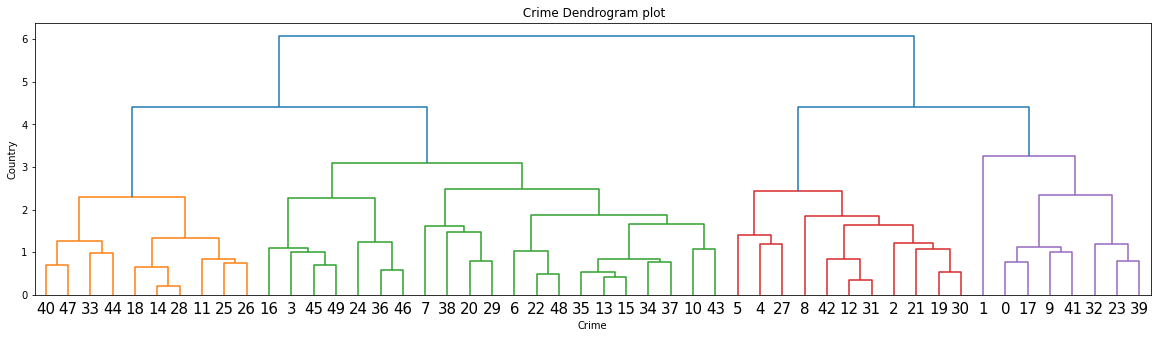

In [10]:
plt.figure(figsize=(20,5));plt.title(' Crime Dendrogram plot');plt.xlabel('Crime');plt.ylabel('Country')
sch.dendrogram(
    z,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=15.,  # font size for the x axis labels
)
plt.show() #seeing the dendogram we can figure out that there are 4 number of clusters in the plot.

In [11]:
#There are 4 number of clusters formed from the graph now we group them into cluster using agglomerative clustering.
#Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering 
h_complete = AgglomerativeClustering(n_clusters=4, linkage='complete',affinity = "euclidean").fit(df_norm) 

h_complete.labels_
#since we have defined 4 clusters 0 represents the values in the 1st cluster 1 represents values in the 2nd and 2 represents value in the 3rd and 3 represents value in the 4th cluster.

array([0, 0, 2, 1, 2, 2, 1, 1, 2, 0, 1, 3, 2, 1, 3, 1, 1, 0, 3, 2, 1, 2,
       1, 0, 1, 3, 3, 2, 3, 1, 2, 2, 0, 3, 1, 1, 1, 1, 1, 0, 3, 0, 2, 1,
       3, 1, 1, 3, 1, 1], dtype=int64)

In [12]:
cluster_labels=pd.Series(h_complete.labels_) #series format

In [13]:
cr['clusters']=cluster_labels # creating a  new column and assigning it to new column 
cr = cr.iloc[:,[5,0,1,2,3,4]]
cr.head()

,clusters,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,0,Alabama,13.2,236,58,21.2
1,0,Alaska,10.0,263,48,44.5
2,2,Arizona,8.1,294,80,31.0
3,1,Arkansas,8.8,190,50,19.5
4,2,California,9.0,276,91,40.6


In [14]:
# getting aggregate mean of each cluster
cr.groupby(cr.clusters).mean()

,Murder,Assault,UrbanPop,Rape
clusters,,,,
0,14.087500,252.750000,53.500000,24.537500
1,5.871429,134.476190,70.761905,18.580952
2,11.054545,264.090909,79.090909,32.618182
3,3.180000,78.700000,49.300000,11.630000


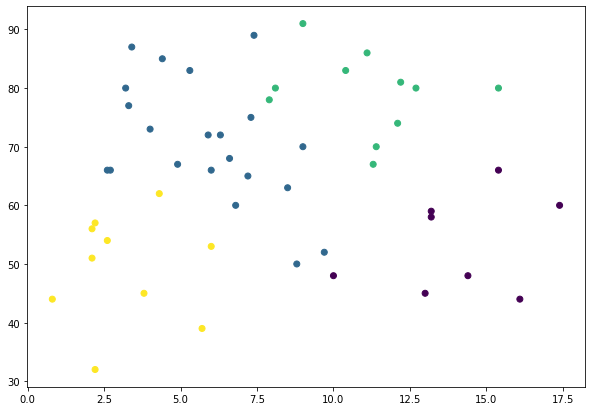

In [18]:
plt.figure(figsize=(10,7))
plt.scatter(cr['Murder'], cr['UrbanPop'], c=cluster_labels)#scatter plot shows the 4 clusters with different colours.